In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
import os
import random

from google. colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Pneumonia_27k.zip

Streaming output truncated to the last 5000 lines.
  inflating: Pneumonia_27k/valid/NORMAL/IM-0499-0001-0002_jpeg_jpg.rf.84f0510d7a4766c8c028c9b4cf16d927.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0499-0001-0002_jpeg_jpg.rf.e910e0b0d95837a307008aec928d1036.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0500-0001_jpeg_jpg.rf.9a06edd4c246bc09501fae2d165ffeea.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0500-0001_jpeg_jpg.rf.a9c5df476567668352523637e5aa160c.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0500-0001_jpeg_jpg.rf.e97daddaa39a5d545e99b8b8c84f0bae.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0501-0001-0001_jpeg_jpg.rf.000c46a17864c55b61d746ac6fd229f3.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0501-0001-0001_jpeg_jpg.rf.2744ec21066e4b095e7485d3fb0df0ba.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0501-0001-0002_jpeg_jpg.rf.228afcc8400ed2e09700a784bc03e528.jpg  
  inflating: Pneumonia_27k/valid/NORMAL/IM-0501-0001-0002_jpeg_jpg.rf.9e08b2d19992220edd2527

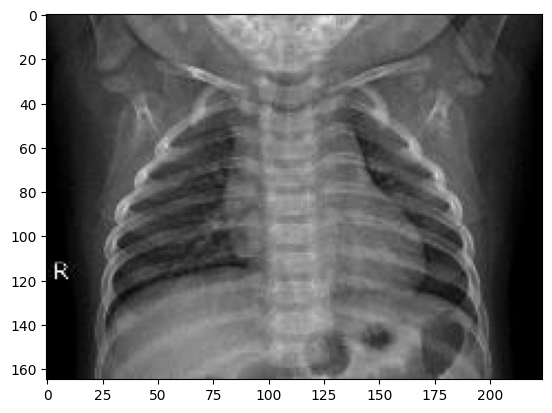

Found 19032 files belonging to 3 classes.
Found 5412 files belonging to 3 classes.
Found 2712 files belonging to 3 classes.


In [3]:
data_train = "/content/Pneumonia_27k/train"
data_test = "/content/Pneumonia_27k/test"
data_val = "/content/Pneumonia_27k/valid"

train_dir = os.path.join (data_train)
test_dir = os.path.join (data_test)
val_dir = os.path.join (data_val)

CATEGORIES =["NORMAL", "PNEUMONIA (BAKTERI)", "PNEUMONIA (VIRUS)" ]
for category in CATEGORIES:
  path = os.path. join (data_train, category)
  for img in os.listdir(path):
    img_array = plt. imread (os.path. join (path, img) )
    plt.imshow (img_array)
    plt. show ()
    break
  break
train_data = tf.keras.utils.image_dataset_from_directory (train_dir,
                                                            image_size = (224, 224),
                                                            class_names = CATEGORIES,
                                                            seed = 5,
                                                            label_mode = 'categorical',
                                                          )
validation_data = tf.keras.utils.image_dataset_from_directory (val_dir,
                                                               image_size = (224, 224),
                                                               class_names = CATEGORIES,
                                                               seed = 5,
                                                               label_mode = 'categorical',
                                                               )
test_data = tf.keras.utils.image_dataset_from_directory (test_dir,
                                                          image_size = (224,224),
                                                          class_names = CATEGORIES,
                                                          seed = 5,
                                                          label_mode = 'categorical',
                                                         )

In [4]:
from keras.src.backend import flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import AveragePooling2D, Dense, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

IMG_SIZE= 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNetV2
base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)

model_loss, model_acc = model.evaluate(test_data)
print("Model Accuray : ", model_acc*100)

predictions = model.predict(test_data)

model_loss, model_acc = model.evaluate(test_data)
print("Model Accuracy:", model_acc * 100)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
595/595 [==============================] - 51s 67ms/step - loss: 1.6594 - accuracy: 0.7332 - val_loss: 1.5815 - val_accuracy: 0.7445
Epoch 2/10
595/595 [==============================] - 37s 62ms/step - loss: 0.9260 - accuracy: 0.8208 - val_loss: 1.8915 - val_accuracy: 0.7683
Epoch 3/10
595/595 [==============================] - 37s 62ms/step - loss: 0.8578 - accuracy: 0.8439 - val_loss: 0.9219 - val_accuracy: 0.8407
Epoch 4/10
595/595 [==============================] - 37s 62ms/step - loss: 0.5604 - accuracy: 0.8816 - val_loss: 1.2491 - val_accuracy: 0.8256
Epoch 5/10
595/595 [==============================] - 37s 62ms/step - loss: 0.6071 - accuracy: 0.8851 - val_loss: 1.4859 - val_accuracy: 0.8237
Epoch 6/10
595/595 [==============================] - 39s 66ms/step - loss: 0.4541 - accuracy: 0.9049 - val_loss: 1.7774 - val_accuracy: 0.7820
Epoch 7/10
595/595 [==============================] - 40s 67ms/step - los

1/1 [==============================] - 1s 731ms/step


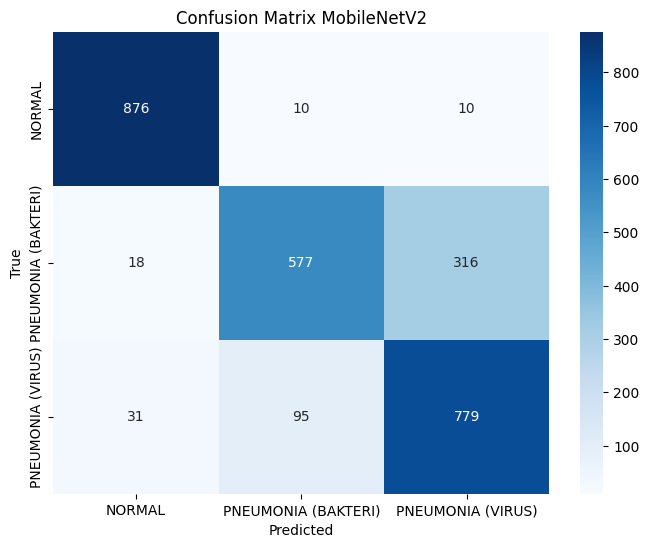

                     precision    recall  f1-score   support

             NORMAL       0.95      0.98      0.96       896
PNEUMONIA (BAKTERI)       0.85      0.63      0.72       911
  PNEUMONIA (VIRUS)       0.70      0.86      0.78       905

           accuracy                           0.82      2712
          macro avg       0.83      0.82      0.82      2712
       weighted avg       0.83      0.82      0.82      2712



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Convert categorical labels into numpy arrays
true_labels = []
predicted_labels = []

for images, labels in test_data:
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(model.predict(images), axis=1))

# Compute the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix MobileNetV2')
plt.show()

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=CATEGORIES))


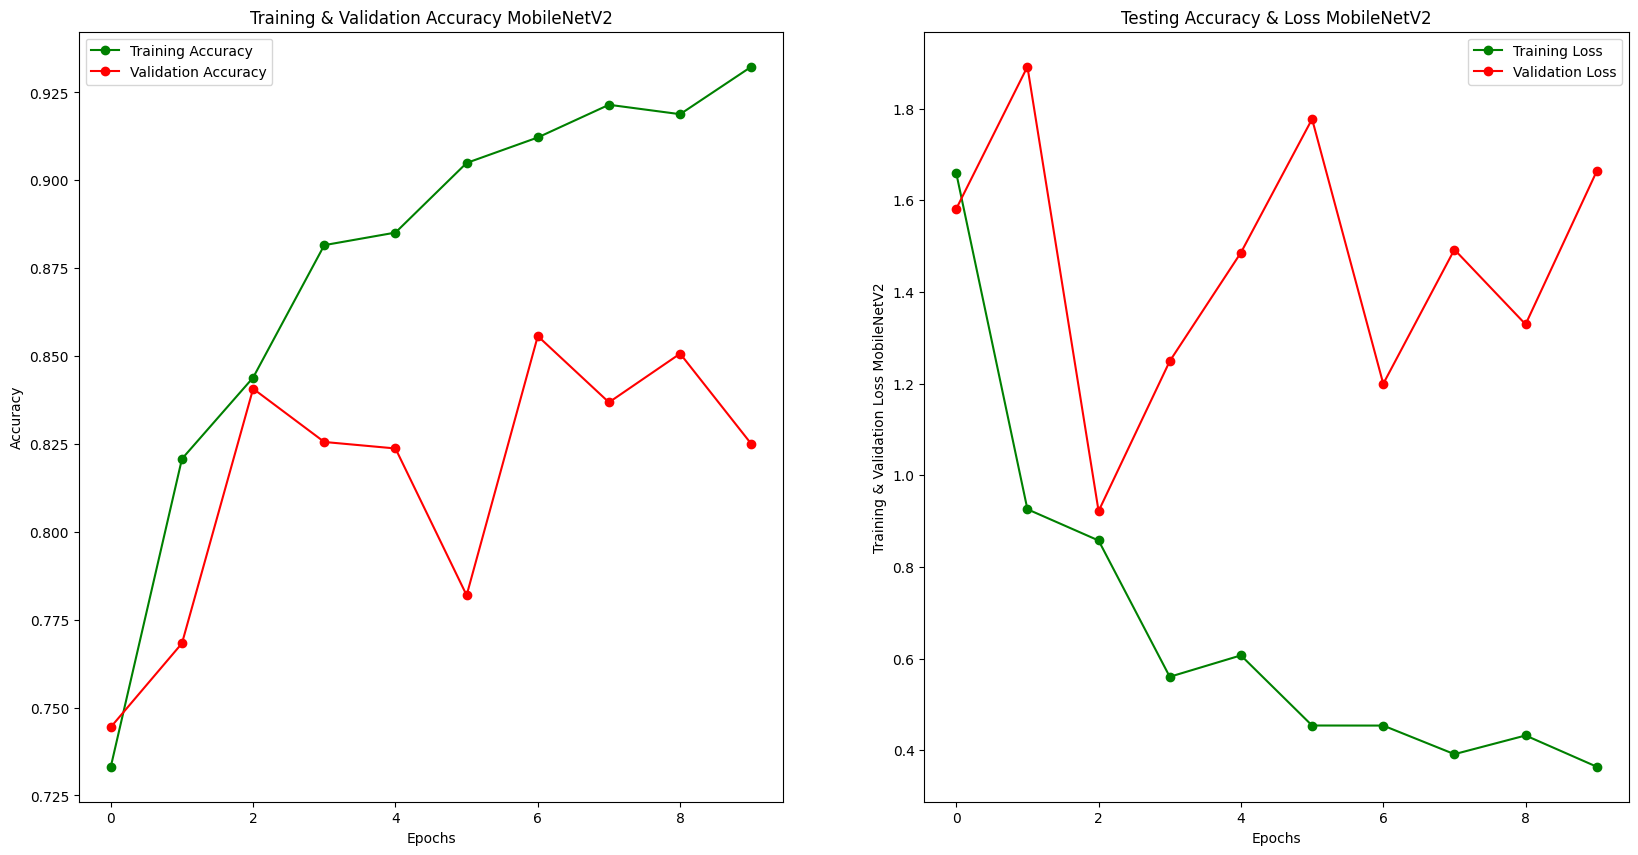

In [6]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy MobileNetV2')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss MobileNetV2')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss MobileNetV2")
plt.show()